In [1]:
from tqdm import tqdm
import numpy as np



import random
tqdm.pandas()
seed = 42
random.seed(seed)
np.random.seed(seed)


print(f"✅ Seed fixed to {seed}")

✅ Seed fixed to 42



DATASET: Dataset 1 (Malicious URLs)
TRAIN → Safe: 342463, Phishing: 75269
VALID → Safe: 42809, Phishing: 9408
TEST → Safe: 42808, Phishing: 9409


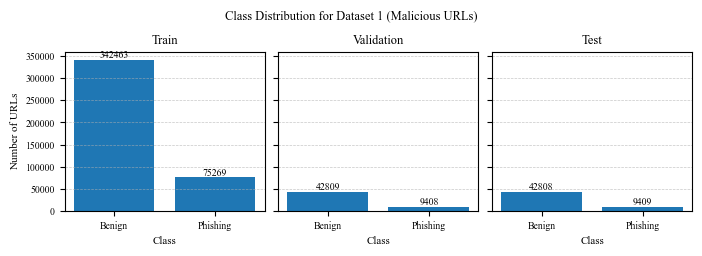


DATASET: Dataset 2 (ndarvind/phiusiil-phishing)
TRAIN → Safe: 107880, Phishing: 80416
VALID → Safe: 13485, Phishing: 10052
TEST → Safe: 13485, Phishing: 10052


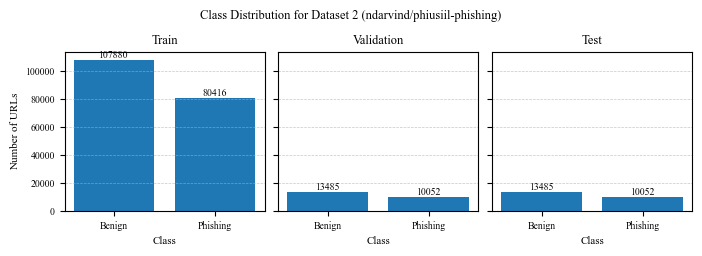


DATASET: Dataset 3 (kmack/Phishing_urls)
TRAIN → Safe: 264169, Phishing: 263928
VALID → Safe: 33022, Phishing: 32991
TEST → Safe: 33021, Phishing: 32991


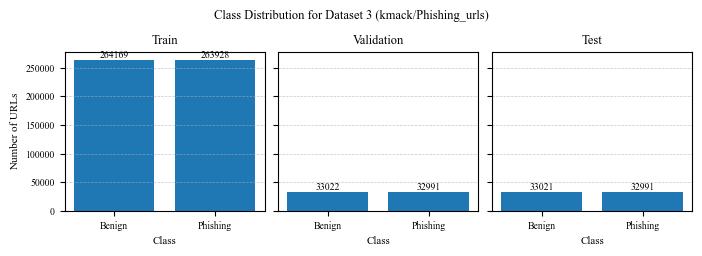


DATASET: Dataset 4 (kaggels/taruntiwarihp/phishing-site-urls)
TRAIN → Safe: 314318, Phishing: 91438
VALID → Safe: 39290, Phishing: 11430
TEST → Safe: 39289, Phishing: 11430


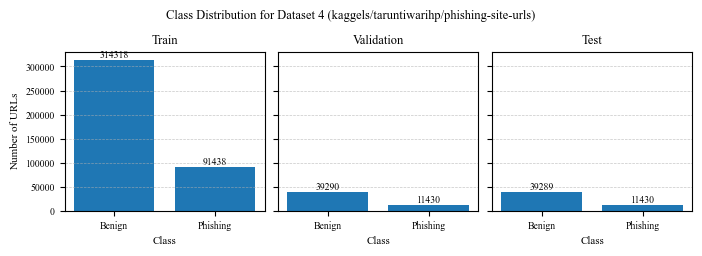

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from S01_dataset_preprocessing_pipeline import all_dataset
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

# IEEE-style global settings
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 8,
    "axes.labelsize": 8,
    "axes.titlesize": 9,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "legend.fontsize": 7,
})

def draw_ieee_bargraphs_for_dataset(dataset_name, splits):
    """
    IEEE-style bar graphs for Benign vs Phishing
    across Train / Validation / Test splits
    """

    split_names = ["Train", "Validation", "Test"]

    # IEEE single-column width ≈ 3.5 inches
    fig, axes = plt.subplots(
        1, 3,
        figsize=(7.0, 2.5),   # 2-column wide figure
        sharey=True
    )

    for ax, split_name, df in zip(axes, split_names, splits):

        benign = (df["label"] == 0).sum()
        phishing = (df["label"] == 1).sum()

        labels = ["Benign", "Phishing"]
        values = [benign, phishing]

        ax.bar(labels, values)
        ax.set_title(split_name)
        ax.set_xlabel("Class")
        ax.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

        # Annotate bars
        for i, v in enumerate(values):
            ax.text(i, v, str(v), ha="center", va="bottom", fontsize=7)

    axes[0].set_ylabel("Number of URLs")

    fig.suptitle(
        f"Class Distribution for {dataset_name}",
        fontsize=9
    )

    plt.tight_layout(pad=0.8)
    plt.show()

gen = all_dataset()

for name, splits in gen:
    print(f"\n==============================")
    print(f"DATASET: {name}")
    print("==============================")

    for split_name, df in zip(['train', 'valid', 'test'], splits):
        safe = (df["label"] == 0).sum()
        phish = (df["label"] == 1).sum()
        print(f"{split_name.upper()} → Safe: {safe}, Phishing: {phish}")

    draw_ieee_bargraphs_for_dataset(name, splits)


In [10]:

def draw_boxplots_for_dataset(name, splits):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"URL Length Boxplots for Dataset: {name}", fontsize=14)

    for ax, (split_name, df) in zip(axs, zip(["train", "valid", "test"], splits)):

        # URL length
        df["url_len"] = df["url"].astype(str).apply(len)

        # Data groups
        overall = df["url_len"]
        safe = df[df["label"] == 0]["url_len"]
        phishing = df[df["label"] == 1]["url_len"]

        # Boxplot
        ax.boxplot(
            [overall, safe, phishing],
            labels=["Overall", "Safe", "Phishing"],
            showmeans=True
        )

        ax.set_title(f"{split_name.upper()} ({len(df)} URLs)")
        ax.set_ylabel("URL Length")
        ax.grid(True, axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()



gen = all_dataset()

for name, splits in gen:
    print(f"\n==============================")
    print(f"DATASET: {name}")
    print("==============================")

    # Print info + ratios
    for split_name, df in zip(['train', 'valid', 'test'], splits):

        print(f"\n--- {split_name.upper()} ---")
        print(f"Total URLs: {len(df)}")

        safe = (df["label"] == 0).sum()
        phish = (df["label"] == 1).sum()

        print(f"Safe (0): {safe}")
        print(f"Phishing (1): {phish}")
        print(f"Ratio: {safe}:{phish}")

    # Draw 3-subplot figure
    #draw_boxplots_for_dataset(name, splits)



DATASET: Dataset 1 (Malicious URLs)

--- TRAIN ---
Total URLs: 417732
Safe (0): 342463
Phishing (1): 75269
Ratio: 342463:75269

--- VALID ---
Total URLs: 52217
Safe (0): 42809
Phishing (1): 9408
Ratio: 42809:9408

--- TEST ---
Total URLs: 52217
Safe (0): 42808
Phishing (1): 9409
Ratio: 42808:9409

DATASET: Dataset 2 (ndarvind/phiusiil-phishing)

--- TRAIN ---
Total URLs: 188296
Safe (0): 107880
Phishing (1): 80416
Ratio: 107880:80416

--- VALID ---
Total URLs: 23537
Safe (0): 13485
Phishing (1): 10052
Ratio: 13485:10052

--- TEST ---
Total URLs: 23537
Safe (0): 13485
Phishing (1): 10052
Ratio: 13485:10052

DATASET: Dataset 3 (kmack/Phishing_urls)

--- TRAIN ---
Total URLs: 528097
Safe (0): 264169
Phishing (1): 263928
Ratio: 264169:263928

--- VALID ---
Total URLs: 66013
Safe (0): 33022
Phishing (1): 32991
Ratio: 33022:32991

--- TEST ---
Total URLs: 66012
Safe (0): 33021
Phishing (1): 32991
Ratio: 33021:32991

DATASET: Dataset 4 (kaggels/taruntiwarihp/phishing-site-urls)

--- TRAIN --


DATASET: Dataset 1 (Malicious URLs)


C:\Users\rrpra\AppData\Local\Temp\ipykernel_27276\3990298510.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


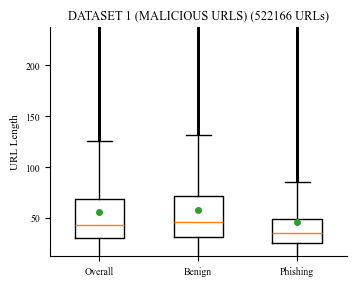


DATASET: Dataset 2 (ndarvind/phiusiil-phishing)


C:\Users\rrpra\AppData\Local\Temp\ipykernel_27276\3990298510.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


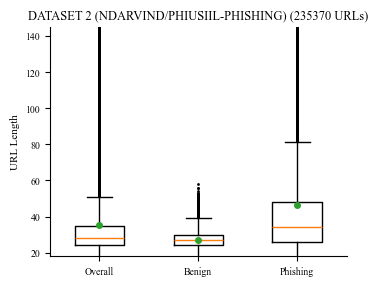


DATASET: Dataset 3 (kmack/Phishing_urls)


C:\Users\rrpra\AppData\Local\Temp\ipykernel_27276\3990298510.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


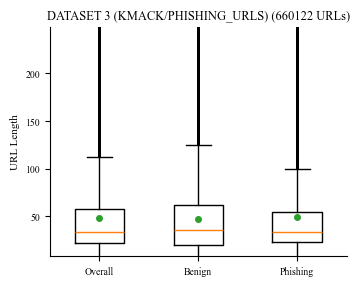


DATASET: Dataset 4 (kaggels/taruntiwarihp/phishing-site-urls)


C:\Users\rrpra\AppData\Local\Temp\ipykernel_27276\3990298510.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


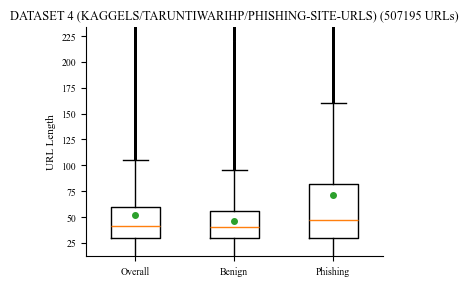

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def draw_boxplots_for_dataset(name, df):
    # URL length
    df["url_len"] = df["url"].astype(str).apply(len)

    # Data groups
    overall = df["url_len"]
    safe = df[df["label"] == 0]["url_len"]
    phishing = df[df["label"] == 1]["url_len"]

    data = [overall, safe, phishing]

    # Robust scaling using percentiles (IEEE-friendly)
    all_values = np.concatenate(data)
    y_min = np.percentile(all_values, 1)
    y_max = np.percentile(all_values, 99)

    # Plot
    plt.figure(figsize=(3.5, 2.8))  # IEEE single-column size

    plt.boxplot(
        data,
        labels=["Overall", "Benign", "Phishing"],
        showmeans=True,
        widths=0.5,
        meanprops=dict(marker='o', markersize=4),
        flierprops=dict(marker='.', markersize=2),
    )

    plt.title(f"{name.upper()} ({len(df)} URLs)", fontsize=9)
    plt.ylabel("URL Length", fontsize=8)

    # Proper scaling
    plt.ylim(y_min, y_max)

    # Remove grid & extra spines (IEEE clean look)
    plt.grid(False)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

    plt.tight_layout(pad=0.6)
    plt.show()

gen = all_dataset()
for name, splits in gen:
    print(f"\n==============================")
    print(f"DATASET: {name}")
    print("==============================")

    # Print info + ratios
    main = pd.concat(splits)
    # Draw 3-subplot figure
    draw_boxplots_for_dataset(name, main)

In [4]:
# get url maxlen
lens = []

for name, splits in all_dataset():
    print(name)
    for df in splits[0:2]:
        lens.extend(df["url"].astype(str).apply(len).tolist())

import numpy as np
lens = np.array(lens)

print("90th percentile:", np.percentile(lens, 90))
print("95th percentile:", np.percentile(lens, 95))
print("99th percentile:", np.percentile(lens, 99))
print("Max:", lens.max())


Dataset 1 (Malicious URLs)
Dataset 2 (ndarvind/phiusiil-phishing)
Dataset 3 (kmack/Phishing_urls)
Dataset 4 (kaggels/taruntiwarihp/phishing-site-urls)
90th percentile: 91.0
95th percentile: 116.0
99th percentile: 236.0
Max: 6097
